## Regularized optimal transport

### Import libraries

In [1]:
import numpy as np
import networkx as nx
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
plt.style.use("science")
from scipy.optimize import linprog
import pandas as pd

### Import data

In [2]:
data = pd.read_csv("../datasets/gaussians_double.csv")
x = data["x"]
n = x.size
y = data["y"]
m = y.size

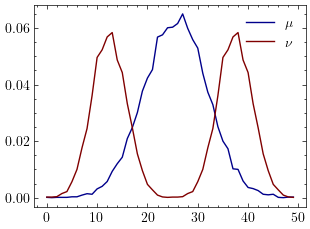

In [3]:
plt.plot(x, color = "darkblue", label=r"$\mu$")
plt.plot(y, color = "maroon", label = r"$\nu$")
plt.legend()
plt.show()

### Entropic regularized optimal transport

$$
\begin{align}
c_{\epsilon} &= \inf_{\gamma \in \Gamma(\mu, \nu)} \int_{X\text{x}Y} c(x,y) d\gamma(x,y) + \epsilon H (\gamma / P) \\
 &= \inf_{\gamma \in \Gamma(\mu, \nu)} \int_{X\text{x}Y} c(x,y) d\gamma(x,y) + \epsilon \gamma(x,y) \log \gamma(x,y) d\gamma(x,y)
\end{align}
$$

where

- $c$: cost function
- $\Gamma$: set of all couplings of $x$ and $y$
- $\gamma$: coupling of $x$ and $y$ in $\Gamma$
- $\epsilon$: regularization term
- $H$: entropy

### Discrete setting

$$
\sum_{i,j} c_{i,j} \gamma_{i,j} + \epsilon \gamma_{i,j} \log \gamma_{i,j}
$$

### Dual formulation

$$
\sum_{i=0}^{n} \phi_i \mu_i + \sum_{j=0}^{m} \psi_j \nu_j - \epsilon \sum_{i,j} \exp(\dfrac{ \phi_i + \psi_j - c_{i,j} }{\epsilon})
$$

where

$$\mu_i = \sum_j \exp(\dfrac{ \phi_i + \psi_j - c_{i,j} }{\epsilon})$$

$$\nu_j = \sum_i \exp(\dfrac{ \phi_i + \psi_j - c_{i,j} }{\epsilon})$$

### Solution to the dual formulation

In [4]:
eps = 0.1

**Cost matrix**

$c(x,y) = (x-y)^2$

In [5]:
c = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        c[i,j] = (x[i] - y[j])**2

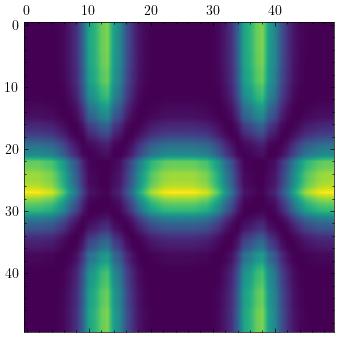

In [6]:
plt.matshow(c, interpolation = 'bilinear')
plt.show()

$A = \exp(-c_{ij} / \epsilon)$

In [9]:
A = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        A[i,j] = np.exp(-c[i,j] / eps)

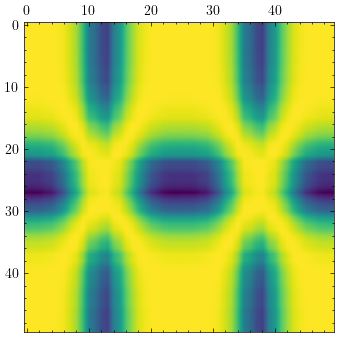

In [10]:
plt.matshow(A, interpolation = 'bilinear')
plt.show()

In [11]:
def sinkhorn_algorithm(z, n, m, mu, nu, itermax = 1000, eps = 1e-3):
    u = np.ones(n)
    u0 = u.copy()
    v = np.ones(m)
    v0 = v.copy()
    for i in range(itermax):
        u = nu / (z @ v)
        v = mu / (z.T @ u)
        if i > 1 and np.linalg.norm(u - u0) < eps and np.linalg.norm(v - v0) < eps:
            print("Sinkhorn algorithm converged after {} iterations".format(i))
            break
        else:
            u0 = u.copy()
            v0 = v.copy()
    return u,v

In [12]:
a, b = sinkhorn_algorithm(A, n, m, x, y)

Sinkhorn algorithm converged after 2 iterations


### From dual to primal formulation

In [13]:
z = np.diag(a) @ A @ np.diag(b)

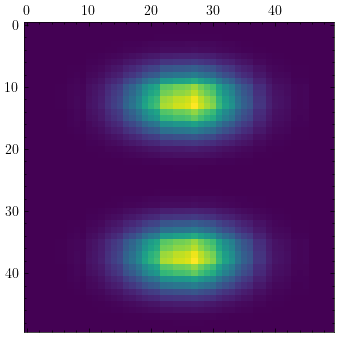

In [14]:
plt.matshow(z)
plt.show()

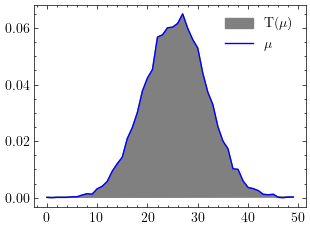

In [15]:
plt.fill(z.sum(0), color = 'grey', label = r'T($\mu$)')
plt.plot(x, color = 'blue', label = r'$\mu$')
plt.legend()
plt.show()

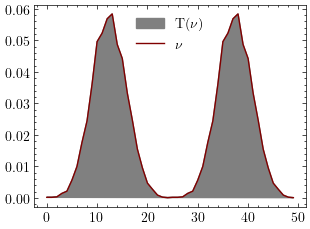

In [16]:
plt.fill(z.sum(1), color = 'grey', label = r'T($\nu$)')
plt.plot(y, color = 'maroon', label = r'$\nu$')
plt.legend()
plt.show()